In [2]:
n = 50
a = randn(n-1)
b = randn(n)
c = randn(n-1)
A = diagm(a,-1) + diagm(b,0) + diagm(c,+1);

In [3]:
using Plots


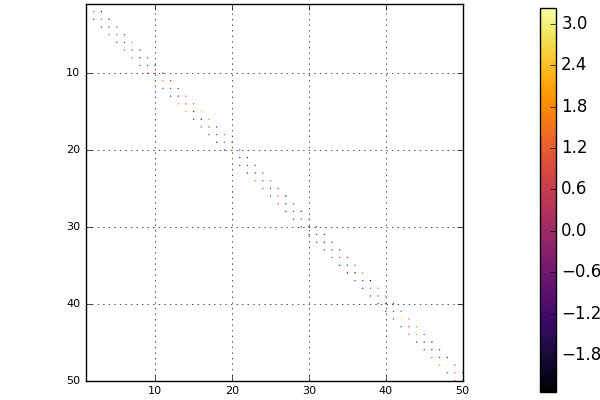

In [5]:
spy(A)

In [6]:
A = sparse(A)
nnz(A)

148

In [7]:
prod(size(A))

2500

In [8]:
density= nnz(A) / prod(size(A))

0.0592

In [9]:
sparsity = 1 - density

0.9408

In [10]:
i, j, v = findnz(A)
for k = 1:nnz(A)
    @printf "%3i  %3i  %10.2e\n" i[k] j[k]  v[k]
end

  1    1   -3.44e-01
  2    1   -2.11e-01
  1    2    7.01e-01
  2    2    5.63e-01
  3    2   -6.73e-01
  2    3   -1.28e+00
  3    3    7.42e-01
  4    3   -5.21e-01
  3    4   -9.56e-01
  4    4   -5.67e-01
  5    4    1.13e+00
  4    5    5.58e-01
  5    5    6.85e-01
  6    5    4.96e-02
  5    6   -5.03e-02
  6    6   -4.17e-01
  7    6    5.78e-01
  6    7    1.65e+00
  7    7    4.00e-01
  8    7    7.62e-01
  7    8   -3.11e-01
  8    8   -8.49e-01
  9    8    2.26e-03
  8    9    3.11e-01
  9    9   -1.30e-01
 10    9    7.12e-01
  9   10   -7.75e-01
 10   10    6.91e-01
 11   10    1.33e+00
 10   11   -1.14e+00
 11   11    1.30e+00
 12   11    4.32e-01
 11   12   -2.80e-01
 12   12    1.83e-01
 13   12   -3.35e-01
 12   13   -3.18e-01
 13   13   -3.64e-01
 14   13    2.20e+00
 13   14    1.36e+00
 14   14    6.91e-01
 15   14    1.72e+00
 14   15    7.41e-01
 15   15   -9.29e-01
 16   15   -5.49e-01
 15   16    2.71e+00
 16   16   -1.64e+00
 17   16    5.00e-01
 16   17    1

In [11]:
#   TRIDISOLVE  Solve tridiagonal system of equations.
#     x = tridisolve(a,b,c,d) solves the system of linear equations
#     b(1)*x(1) + c(1)*x(2) = d(1),
#     a(j-1)*x(j-1) + b(j)*x(j) + c(j)*x(j+1) = d(j), j = 2:n-1,
#     a(n-1)*x(n-1) + b(n)*x(n) = d(n).

function tridisolve(a,b,c,d)
    x = d
    n = length(x)

    # Elimination
    for j = 1:n-1
        μ = a[j]/b[j]
        b[j+1] = b[j+1] - μ*c[j]
        x[j+1] = x[j+1] - μ*x[j]
    end
    
    # Backsolve
    x[n] = x[n]/b[n]
    for j = n-1:-1:1
        x[j] = ( x[j]-c[j]*x[j+1] ) / b[j]
    end
    return x
end;

In [12]:
n = 10000
a = randn(n-1)
b = randn(n)
c = randn(n-1)
d = randn(n);

In [13]:
# Dense
A = diagm(a,-1) + diagm(b,0) + diagm(c,+1);
@time x = A \ d;

 13.039791 seconds (742.48 k allocations: 792.016 MB, 1.32% gc time)


In [15]:
@time x = tridisolve(a,b,c,d);

  0.000256 seconds (4 allocations: 160 bytes)


In [16]:
S = sparse(A);
@time x = S \ d;

  0.618563 seconds (453.16 k allocations: 19.357 MB, 16.41% gc time)
